In [ ]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import sklearn.metrics
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
data = pd.read_csv("breast-cancer.csv")

In [ ]:
data= data.rename({"diagnosis": "malignant_cancer"}, axis= "columns")
X= data.drop(["id", "malignant_cancer"], axis= "columns")
y= data["malignant_cancer"]
y= y.map({"M": 1, "B": 0})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.25, random_state= 100)

In [ ]:
scaler= StandardScaler()

scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [ ]:
nn_model = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
                                                 max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                                                 n_iter_no_change=10)

nn_model.fit(X_train_scaled, y_train)

y_pred= nn_model.predict(X_test_scaled)

results_df = pd.DataFrame(
    data=[["Neural Network", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_df 

,Model,Accuracy,Precision,Recall,F1 Score
0,Neural Network,0.972028,1.0,0.928571,0.962963


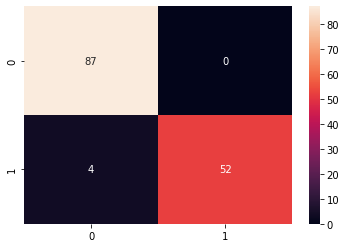

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

sns.heatmap(cm, annot=True)